In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [31]:
# tweet_averages = [
#     ["Activist Tweets/Day 2014/5", 3.23, 3.86, 4.11], 
#     ["Activist Tweets/Day 2020", 1.31, 1.72, 1.76], 
#     ["Counter-Protest Tweets/Day 2014/5", 2.49, 2.72, 3.38], 
#     ["Counter-Protest Tweets/Day 2020", 1.87, 1.75, 2.58], 
# ]

retweet_averages = {
    "Activist 2014/5":  [2.20, 2.84, 2.68],
    "Counter-Protest 2014/5": [1.47, 1.66, 1.98], 
    "Activist 2020": [1.02, 1.33, 1.26], 
    "Counter-Protest 2020": [1.16, 1.37, 2.02], 
}
tweet_averages = {
    "Activist 2014/5": [3.23, 3.86, 4.11],
    "Counter-Protest 2014/5": [2.49, 2.72, 3.38], 
    "Activist 2020": [1.31, 1.72, 1.76],
    "Counter-Protest 2020": [1.87, 1.75, 2.58],
}

tweet_df = pd.DataFrame(
    tweet_averages, 
    index=["Struggle Phase", "Surge Phase", "Consolidation Phase"],
)
retweet_df = pd.DataFrame(
    retweet_averages, 
    index=["Struggle Phase", "Surge Phase", "Consolidation Phase"]
)
ot_values = tweet_df.values - retweet_df.values
original_tweet_df = pd.DataFrame(ot_values, index=tweet_df.index, columns=tweet_df.columns)

In [32]:
print(ot_values)
original_tweet_df

[[1.03 1.02 0.29 0.71]
 [1.02 1.06 0.39 0.38]
 [1.43 1.4  0.5  0.56]]


,Activist 2014/5,Counter-Protest 2014/5,Activist 2020,Counter-Protest 2020
Struggle Phase,1.03,1.02,0.29,0.71
Surge Phase,1.02,1.06,0.39,0.38
Consolidation Phase,1.43,1.40,0.50,0.56


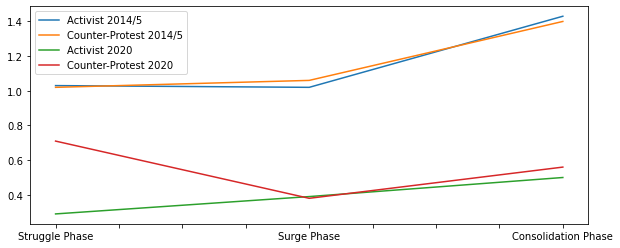

In [34]:
original_tweet_df.plot.line(figsize=(10,4))

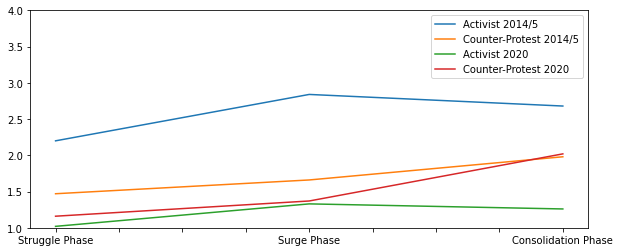

In [35]:
retweet_df.plot.line(figsize=(10,4), ylim=(1.0, 4.0))

In [36]:
ratio_df = original_tweet_df / retweet_df
ratio_df

,Activist 2014/5,Counter-Protest 2014/5,Activist 2020,Counter-Protest 2020
Struggle Phase,0.468182,0.693878,0.284314,0.612069
Surge Phase,0.359155,0.638554,0.293233,0.277372
Consolidation Phase,0.533582,0.707071,0.396825,0.277228


In [111]:
tweet_df

,Activist 2014/5,Counter-Protest 2014/5,Activist 2020,Counter-Protest 2020
Struggle Phase,3.23,2.49,1.31,1.87
Surge Phase,3.86,2.72,1.72,1.75
Consolidation Phase,4.11,3.38,1.76,2.58


Text(0.0, 1.0, 'B')

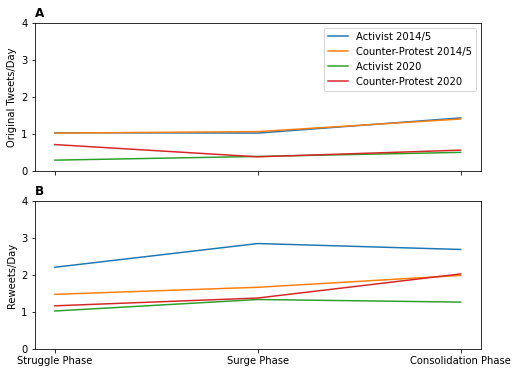

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,6))
for col in original_tweet_df.columns:
    ax1.plot(original_tweet_df.index, original_tweet_df[col])
ax1.set_ylim(0.0, 4.0)
ax1.set_ylabel("Original Tweets/Day")
ax1.legend(original_tweet_df.columns)
ax1.set_title("A", loc="left", fontweight="extra bold")
for col in retweet_df.columns:
    ax2.plot(retweet_df.index, retweet_df[col])
ax2.set_ylim(0.0, 4.0)
ax2.set_ylabel("Reweets/Day")
ax2.set_title("B", loc="left", fontweight="extra bold")

[Text(0, 0, 'Struggle'), Text(0, 0, 'Surge'), Text(0, 0, 'Consolidation')]

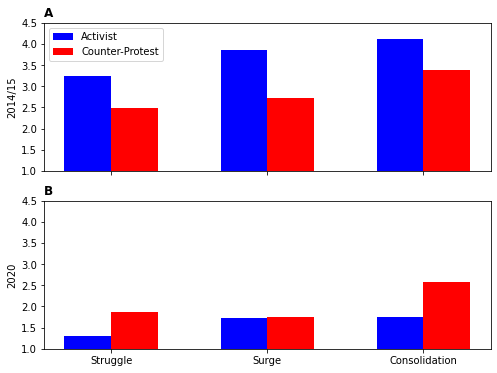

In [115]:
# Average tweets per day by stance
labels = ["Struggle", "Surge", "Consolidation"]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,6))
colors = ["blue", "red"]
x = np.arange(len(labels))
width = 0.3

def draw_bars(ax, ylabel, title, columns):
    for i, col in enumerate(columns):
        ax.bar(x + (i - 0.5) * width, tweet_df[col], width, color=colors[i])  
    ax.set_ylabel(ylabel)
    ax.set_ylim(1.0, 4.5)
    ax.set_title(title, loc="left", fontweight="extra bold")
    ax.set_xticks(x) 

draw_bars(ax1, "2014/15", "A",  tweet_df.columns[:2])
ax1.legend(["Activist", "Counter-Protest"], loc="upper left")

draw_bars(ax2, "2020", "B", tweet_df.columns[2:])
ax2.set_xticklabels(labels)



[Text(0, 0, 'Struggle'), Text(0, 0, 'Surge'), Text(0, 0, 'Consolidation')]

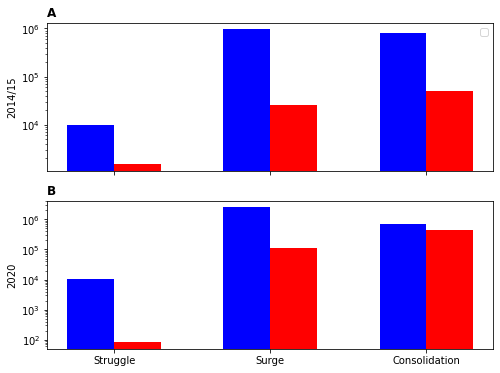

In [110]:
# Total tweets per day by stance
tweets_by_stance_2014_15 = {"Activist": [9762, 957706, 819465], "Counter-Protest":[1506, 26023, 48932]}
tweets_by_stance_2020 = {"Activist": [10464, 2525551, 708529], "Counter-Protest":[84, 114530, 442312]}
labels = ["Struggle", "Surge", "Consolidation"]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,6))
colors = ["blue", "red"]
x = np.arange(len(labels))
width = 0.3

def draw_bars(ax, ylabel, title, data):
    for i, k in enumerate(data):
        ax.bar(x + (i - 0.5) * width, data[k], width, color=colors[i])  
    ax.set_ylabel(ylabel)
    ax.set_yscale("log")
    ax.set_title(title, loc="left", fontweight="extra bold")
    ax.set_xticks(x) 

draw_bars(ax1, "2014/15", "A",  tweets_by_stance_2014_15)
ax1.legend(k for k in tweets_by_stance_2014_15)

draw_bars(ax2, "2020", "B", tweets_by_stance_2020)
ax2.set_xticklabels(labels)


In [227]:
activist_2014_emos = {
    "anger": [5.5, 0.0, 0.0],
    "fear": [7.1, 8.0, 7.8],
    "sadness": [0.0, 5.9, 6.3],
    "anticip": [0.0, 0.0, 0.0],
    "trust": [13.1, 12.9, 12.1],
}
activist_2020_emos = {
    "anger": [18.5, 0.0, 6.2],
    "fear": [20.0, 4.7, 7.2],
    "sadness": [0.0, 0.0, 0.0],
    "anticip": [0.0, 5.0, 0.0],
    "trust": [7.7, 11.2, 14.7],
}
counter_2014_emos = {
    "anger": [0.0, 0.0, 0.0],
    "fear": [29.7, 8.8, 8.3],
    "sadness": [20.4, 11.2, 8.1],
    "anticip": [0.0, 0.0, 0.0],
    "trust": [9.4, 10.4, 8.1],
}
counter_2020_emos = {
    "anger": [2.4, 0.0, 0.0],
    "fear": [0.0, 10.9, 11.3],
    "sadness": [0.0, 13.7, 9.0],
    "anticip": [17.5, 0.0, 0.0],
    "trust": [18.2, 13.2, 12.3],
}
color_chart = {
    "anger": "xkcd:cranberry", 
    "fear": "xkcd:tomato red",
    "sadness": "xkcd:scarlet",
    "anticip": "xkcd:dark seafoam",
    "trust": "xkcd:peacock blue",
}

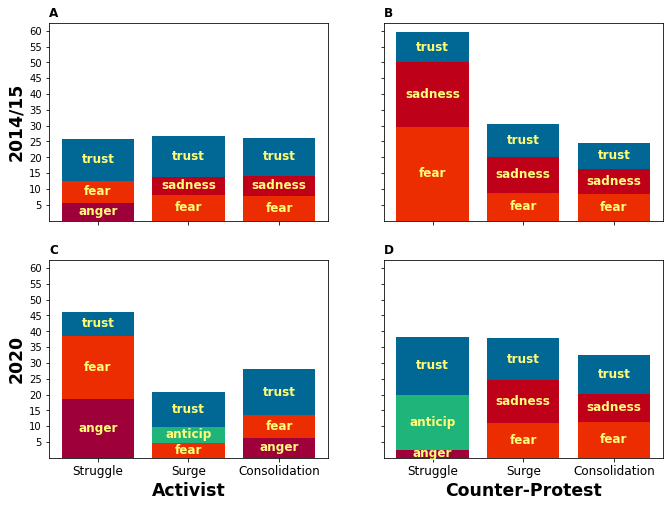

In [228]:
# Top 3 Emotions by Stance and Phase
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(11,8))
width = 0.8
x = np.array([i for i in range(1, 4)])
plt.yticks([i for i in range(5, 65, 5)]) 
plt.xticks(x - width, ["Struggle", "Surge", "Consol"], fontsize="large")

def draw_chart(ax, title, emos, x_label="", y_label=""):
    bottoms = np.array([0.0, 0.0, 0.0])
    for emo in emos:
        ax.bar(
            x = ax.get_xticks(), 
            height=emos[emo], 
            width=width, 
            bottom=bottoms,
            color=color_chart[emo]
        )
        for i, x in enumerate(ax.get_xticks()):
            if emos[emo][i] < 1.0:
                continue
            ax.text(
                x, 
                bottoms[i] + 0.5 * emos[emo][i] - 1.0, 
                emo, 
                ha="center", 
                color="xkcd:custard", 
                fontweight="bold",
                fontsize="large")
        bottoms += np.array(emos[emo])
    ax.set_title(title, loc="left", fontweight="bold")
    ax.set_yticks([i for i in range(5, 65, 5)])
    ax.set_xticks([0.2, 1.2, 2.2])
    ax.set_xticklabels(["Struggle", "Surge", "Consolidation"], fontsize="large")
    ax.set_xlabel(x_label, fontweight="demibold", fontsize="xx-large")
    ax.set_ylabel(y_label, fontweight="demibold", fontsize="xx-large")

axes = [ax1, ax2, ax3, ax4]
titles = ["A", "B", "C", "D"]
emo_maps = [activist_2014_emos, counter_2014_emos, activist_2020_emos, counter_2020_emos]
xlabels = ["", "", "Activist", "Counter-Protest"]
ylabels = ["2014/15", "", "2020", ""]
for i, (ax, title, emos, x_label, y_label) in enumerate(zip(axes, titles, emo_maps, xlabels, ylabels)):
    draw_chart(ax, title, emos, x_label, y_label)